## Logistic Regression ##

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [62]:
# Load the dataset
df = pd.read_csv('./data/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### **Data Preprocessing** ###
Assuming columns: `Age`, `EstimatedSalary` as features and `Purchased` as the target
- 75% -> Training (300 samples)
- 25% -> Testing (100 samples)
- The `random_state` ensures that the data split is the same every time you run the code, making the results reproducible. if you don't specify the `random_state` it will generate different output every time you run the code


In [81]:
# Select features and target
X = df[['Age', 'EstimatedSalary']] 
y = df['Purchased']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


`StandardScaler()` tranform your data so that:
- Mean = 0
- Standard Deviation = 1
This is called Stadardization(or Z-score normalization)

by using this we can brings all features to the same scale so that no single feature dominates due to it's magnitude

e.g
Imagine you have a dataset 
| **Age (years)** | **Salary (₹)** |
|-----------------|----------------|
| 20              | 25,000         |
| 30              | 50,000         |
| 40              | 90,000         |


As you can see:
- `Age` is in the range 20-40
- `Salary` is in the range of 25,000 - 90,000

By applying `StandardScaler`
| **Index** | **Age** | **Salary** |
|----------:|--------:|-----------:|
| 0         | -1.22   | -1.15      |
| 1         |  0.00   | -0.06      |
| 2         |  1.22   |  1.21      |



- All the values around mean = 0
- Scales are balanced for both features

Without scaling:

- The model might focus more on Salary because its numbers are bigger.

- The decision boundary could be skewed.

With scaling:

- Both Age and Salary have equal importance.

- Model trains faster and performs better.

### **Train Logistic Regression Model** ###

In [85]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## **Predict and Evaluate** ##

In [88]:
y_pred = model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Confusion Matrix give you
#[TN][FP]
#[FN][TP]




Confusion Matrix:
 [[65  3]
 [ 8 24]]


In [90]:
# Extracting values from confusion Matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Output
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



True Positives (TP): 24
False Positives (FP): 3
True Negatives (TN): 65
False Negatives (FN): 8
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


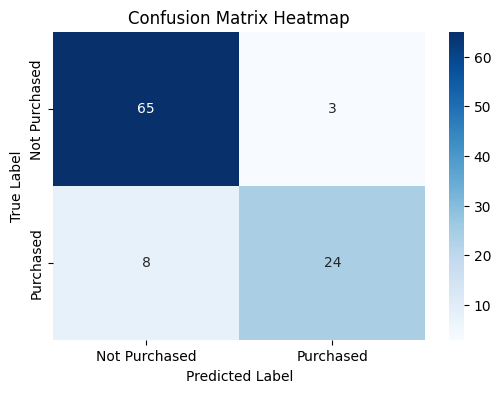

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### **From the graph check** ####
- Are TP & TN values is high which is `Good`.
- Are FP & FN values high? `Bad` Model might need improvement.
- The diagonal (top-left to bottom-right) should ideally have darker colors — it means correct predictions.


#### **The graph shows that** ####
- True Negative (TN = 65): Model correctly predicted "Not Purchased".
- False Positive (FP = 3): Model incorrectly predicted "Purchased" when it was actually "Not Purchased".
- False Negative (FN = 8): Model incorrectly predicted "Not Purchased" when it was actually "Purchased".
- True Positive (TP = 24): Model correctly predicted "Purchased".

#### **Final Interpretaion** ####
- The model is very good at predicting "Not Purchased"
- It has a bit of trouble identifying all the actual "Purchased" cases (misses 8 of them)

